# Assignment 3

## This assignment uses FF_data_2021_daily.csv from Kenneth French’s data library (specifically from the Fama/French 3 Factors dataset). 
## We will also use data from Yahoo Finance on Fidelity’s Low Priced Stock Fund.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

Q1

Use Pandas to read in the FF-factors csv file and the fund data csv file into Jupyter Note- book with Pandas. 

For the FF-factors file, for example, use the following command:

df_FF=pd.read_csv(root +'/FF_data_2021_daily.csv', index_col='Date',parse_dates=True) df_FF.head()

In [2]:
# Change this root to your own directory
# OR save the file in the same directory as your Jupyter Notebook
root = '/Users/W.YSun/Desktop/python'
df_FF=pd.read_csv(root +'/FF_data_2021_daily.csv', index_col='Date',parse_dates=True)
df_FF.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.24,-0.28,0.009
1926-07-02,0.45,-0.32,-0.08,0.009
1926-07-06,0.17,0.27,-0.35,0.009
1926-07-07,0.09,-0.59,0.03,0.009
1926-07-08,0.21,-0.36,0.15,0.009


In [3]:
df_FF.tail()

,Mkt-RF,SMB,HML,RF
Date,,,,
2021-06-24,0.68,0.62,0.23,0.0
2021-06-25,0.32,-0.68,0.46,0.0
2021-06-28,0.23,-0.48,-1.59,0.0
2021-06-29,0.01,-0.23,-0.27,0.0
2021-06-30,0.08,-0.11,0.78,0.0


Q2

Read into Pandas the data on Fidelity’s Low Priced Stock Fund as above

In [4]:
df_fund=pd.read_csv(root +'/fidelity_low_priced_stock_fund_daily.csv', index_col='Date',parse_dates=True)
df_fund

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
1989-12-27,10.000000,10.000000,10.000000,10.000000,7.560036,0,NaN
1989-12-28,9.820000,9.820000,9.820000,9.820000,7.423954,0,-1.816415
1989-12-29,9.890000,9.890000,9.890000,9.890000,7.476876,0,0.710326
1990-02-01,9.950000,9.950000,9.950000,9.950000,7.522234,0,0.604811
1990-03-01,10.010000,10.010000,10.010000,10.010000,7.567599,0,0.601268
...,...,...,...,...,...,...,...
2021-08-23,58.029999,58.029999,58.029999,58.029999,58.029999,0,0.865357
2021-08-24,58.490002,58.490002,58.490002,58.490002,58.490002,0,0.789573
2021-08-25,58.779999,58.779999,58.779999,58.779999,58.779999,0,0.494581


Q3

Add a returns column (measured in percent as opposed to decimal places) to the df_fund dataframe using the following command:

100*df_fund['Adj Close'].pct_change()

In [5]:
df_fund['add_returns'] = 100*df_fund['Adj Close'].pct_change()
df_fund

,Open,High,Low,Close,Adj Close,Volume,Returns,add_returns
Date,,,,,,,,
1989-12-27,10.000000,10.000000,10.000000,10.000000,7.560036,0,NaN,NaN
1989-12-28,9.820000,9.820000,9.820000,9.820000,7.423954,0,-1.816415,-1.800018
1989-12-29,9.890000,9.890000,9.890000,9.890000,7.476876,0,0.710326,0.712855
1990-02-01,9.950000,9.950000,9.950000,9.950000,7.522234,0,0.604811,0.606644
1990-03-01,10.010000,10.010000,10.010000,10.010000,7.567599,0,0.601268,0.603079
...,...,...,...,...,...,...,...,...
2021-08-23,58.029999,58.029999,58.029999,58.029999,58.029999,0,0.865357,0.869112
2021-08-24,58.490002,58.490002,58.490002,58.490002,58.490002,0,0.789573,0.792699
2021-08-25,58.779999,58.779999,58.779999,58.779999,58.779999,0,0.494581,0.495806


Q4

Join the two dataframes together by the date index as follows:

df_fund = df_fund.join(df_FF)

df_fund.head()

In [6]:
df_fund = df_fund.join(df_FF)
df_fund.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,add_returns,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,
1989-12-27,10.00,10.00,10.00,10.00,7.560036,0,NaN,NaN,0.50,-0.16,-0.13,0.030
1989-12-28,9.82,9.82,9.82,9.82,7.423954,0,-1.816415,-1.800018,0.46,-0.25,-0.28,0.030
1989-12-29,9.89,9.89,9.89,9.89,7.476876,0,0.710326,0.712855,0.77,0.33,-0.29,0.030
1990-02-01,9.95,9.95,9.95,9.95,7.522234,0,0.604811,0.606644,0.08,0.56,-0.04,0.030
1990-03-01,10.01,10.01,10.01,10.01,7.567599,0,0.601268,0.603079,0.26,-0.04,-0.13,0.029


Q5

Add an excess returns column, called ‘ExRetFund’, to the df_fund dataframe by subtract- ing the FF risk-free rate ‘RF’ from the funds returns.

In [7]:
df_fund['ExRetFund'] = df_fund['add_returns'] - df_fund['RF']
df_fund

,Open,High,Low,Close,Adj Close,Volume,Returns,add_returns,Mkt-RF,SMB,HML,RF,ExRetFund
Date,,,,,,,,,,,,,
1989-12-27,10.000000,10.000000,10.000000,10.000000,7.560036,0,NaN,NaN,0.50,-0.16,-0.13,0.030,NaN
1989-12-28,9.820000,9.820000,9.820000,9.820000,7.423954,0,-1.816415,-1.800018,0.46,-0.25,-0.28,0.030,-1.830018
1989-12-29,9.890000,9.890000,9.890000,9.890000,7.476876,0,0.710326,0.712855,0.77,0.33,-0.29,0.030,0.682855
1990-02-01,9.950000,9.950000,9.950000,9.950000,7.522234,0,0.604811,0.606644,0.08,0.56,-0.04,0.030,0.576644
1990-03-01,10.010000,10.010000,10.010000,10.010000,7.567599,0,0.601268,0.603079,0.26,-0.04,-0.13,0.029,0.574079
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,58.029999,58.029999,58.029999,58.029999,58.029999,0,0.865357,0.869112,NaN,NaN,NaN,NaN,NaN
2021-08-24,58.490002,58.490002,58.490002,58.490002,58.490002,0,0.789573,0.792699,NaN,NaN,NaN,NaN,NaN
2021-08-25,58.779999,58.779999,58.779999,58.779999,58.779999,0,0.494581,0.495806,NaN,NaN,NaN,NaN,NaN


Q6

Compute summary statistics for the fund’s excess returns and the market’s excess returns. 

Include a one or two line comment on these statistics.

In [8]:
df_fund['ExRetFund'].describe()

count    7005.000000
mean        0.019514
std         1.011257
min       -11.387474
25%        -0.346971
50%         0.081831
75%         0.455178
max        10.031323
Name: ExRetFund, dtype: float64

In [9]:
df_fund['Mkt-RF'].describe()

count    7006.000000
mean        0.036791
std         1.143746
min       -12.000000
25%        -0.440000
50%         0.070000
75%         0.570000
max        11.350000
Name: Mkt-RF, dtype: float64

In [10]:
df_fund.cov()

,Open,High,Low,Close,Adj Close,Volume,Returns,add_returns,Mkt-RF,SMB,HML,RF,ExRetFund
Open,181.890059,181.890059,181.890059,181.890059,180.732741,0.0,0.050976,0.046674,0.116847,0.017659,-0.100800,-0.078105,0.071451
High,181.890059,181.890059,181.890059,181.890059,180.732741,0.0,0.050976,0.046674,0.116847,0.017659,-0.100800,-0.078105,0.071451
Low,181.890059,181.890059,181.890059,181.890059,180.732741,0.0,0.050976,0.046674,0.116847,0.017659,-0.100800,-0.078105,0.071451
Close,181.890059,181.890059,181.890059,181.890059,180.732741,0.0,0.050976,0.046674,0.116847,0.017659,-0.100800,-0.078105,0.071451
Adj Close,180.732741,180.732741,180.732741,180.732741,181.542158,0.0,0.040139,0.038559,0.128025,0.020845,-0.122083,-0.078661,0.055858
Volume,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Returns,0.050976,0.050976,0.050976,0.050976,0.040139,0.0,1.023613,1.015628,0.686754,0.077679,0.076867,-0.000021,1.030261
add_returns,0.046674,0.046674,0.046674,0.046674,0.038559,0.0,1.015628,1.008183,0.685447,0.077196,0.076709,-0.000036,1.022524
Mkt-RF,0.116847,0.116847,0.116847,0.116847,0.128025,0.0,0.686754,0.685447,1.308156,0.003480,-0.014707,-0.000140,0.685588
SMB,0.017659,0.017659,0.017659,0.017659,0.020845,0.0,0.077679,0.077196,0.003480,0.353746,-0.034907,-0.000179,0.077375


Q7

In the next step I want you to use statsmodels to run a regression with the response set equal to the fund excess returns and the predictor equal to the market excess returns. 

As in the slides, we will use statsmodels.formula.api. 

This API requires that the names of variables are standard. 

This means we must change the name of the market excess return as follows:

df_fund = df_fund.rename(columns={'Mkt-RF': 'MRP'})

In [11]:
df_fund = df_fund.rename(columns={'Mkt-RF': 'MRP'})
df_fund

,Open,High,Low,Close,Adj Close,Volume,Returns,add_returns,MRP,SMB,HML,RF,ExRetFund
Date,,,,,,,,,,,,,
1989-12-27,10.000000,10.000000,10.000000,10.000000,7.560036,0,NaN,NaN,0.50,-0.16,-0.13,0.030,NaN
1989-12-28,9.820000,9.820000,9.820000,9.820000,7.423954,0,-1.816415,-1.800018,0.46,-0.25,-0.28,0.030,-1.830018
1989-12-29,9.890000,9.890000,9.890000,9.890000,7.476876,0,0.710326,0.712855,0.77,0.33,-0.29,0.030,0.682855
1990-02-01,9.950000,9.950000,9.950000,9.950000,7.522234,0,0.604811,0.606644,0.08,0.56,-0.04,0.030,0.576644
1990-03-01,10.010000,10.010000,10.010000,10.010000,7.567599,0,0.601268,0.603079,0.26,-0.04,-0.13,0.029,0.574079
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,58.029999,58.029999,58.029999,58.029999,58.029999,0,0.865357,0.869112,NaN,NaN,NaN,NaN,NaN
2021-08-24,58.490002,58.490002,58.490002,58.490002,58.490002,0,0.789573,0.792699,NaN,NaN,NaN,NaN,NaN
2021-08-25,58.779999,58.779999,58.779999,58.779999,58.779999,0,0.494581,0.495806,NaN,NaN,NaN,NaN,NaN


Q8

Using the formula notation in the slides, run a univariate regression ExRetFund ∼ MRP. 

This is called a CAPM regression where the excess returns of the market portfolio are used to explain the excess returns of the fund.

In [12]:
# fit the model with .fit() and show results
uni_model = ols("ExRetFund ~ MRP", data = df_fund).fit()
# Inspect the results
print(uni_model.summary())

                            OLS Regression Results                            
Dep. Variable:              ExRetFund   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     3793.
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:22:08   Log-Likelihood:                -8501.7
No. Observations:                7005   AIC:                         1.701e+04
Df Residuals:                    7003   BIC:                         1.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.010      0.028      0.9

Q9

Produce a scatter plot with the market excess returns on the horizontal access and the fund excess returns on the vertical access and include the best fit line on the plot.

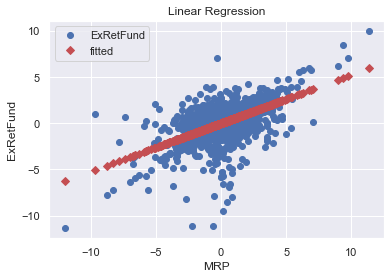

In [13]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(uni_model, 1, ax=ax, vlines=False)
ax.set_ylabel("ExRetFund")
ax.set_xlabel("MRP")
ax.set_title("Linear Regression")
plt.show()

Q10

Using the formula notation in the slides, run a multiple regression ExRetFund ∼ MRP + SMB+HML. 

This is called a Fama-French regression where the excess returns of the market portfolio, the returns of the size portolio and the returns of the value portfolio are used to explain the excess returns of the fund.

In [14]:
# fit the model with .fit() and show results
mult_model = ols("ExRetFund ~ MRP+SMB+HML", data = df_fund).fit()
# Inspect the results
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:              ExRetFund   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     1463.
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:22:08   Log-Likelihood:                -8313.0
No. Observations:                7005   AIC:                         1.663e+04
Df Residuals:                    7001   BIC:                         1.666e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0025      0.009     -0.262      0.7

#Q11

The following code shows how to invert a matrix and take the dot product of matrices in Python.

import numpy as np

x = np.array([[1,2],[3,4]])

y = np.linalg.inv(x)

print x

print y

print np.dot(x,y)

In the case of the three factor model, confirm that the coefficient results from statsmodels match up with the coefficients calculated using the formula from the slides:

$ \beta = (X^{'}X)^{−1} (X'y) $

Remember to drop the first row of the dataframe in defining X and y as the first entry of the fund’s (excess) return is NaN.

In [15]:
X = df_fund.dropna()
X = X[['MRP','SMB','HML']]
X.insert(loc=0, column='ones', value=np.ones(X.shape[0]))
X = X.to_numpy()
X

array([[ 1.  ,  0.46, -0.25, -0.28],
       [ 1.  ,  0.77,  0.33, -0.29],
       [ 1.  ,  0.08,  0.56, -0.04],
       ...,
       [ 1.  , -0.67,  0.58,  3.66],
       [ 1.  ,  0.62,  0.6 , -1.16],
       [ 1.  ,  0.19,  1.15, -0.32]])

In [16]:
Y = df_fund.dropna()
Y = Y['ExRetFund']
Y = Y.to_numpy()
Y

array([-1.83001788,  0.68285463,  0.57664374, ...,  0.61982952,
       -1.06091549,  0.62036879])

In [17]:
# β = (X'X)^−1 (X'y)
(np.linalg.inv((X.T)@X))@((X.T)@Y)

array([-0.00248271,  0.52568548,  0.23357753,  0.20331493])

In [18]:
'''
Intercept     -0.0025      0.009     -0.262      0.793      -0.021       0.016
MRP            0.5257      0.008     63.445      0.000       0.509       0.542
SMB            0.2336      0.016     14.607      0.000       0.202       0.265
HML            0.2033      0.014     14.418      0.000       0.176       0.231
'''

'\nIntercept     -0.0025      0.009     -0.262      0.793      -0.021       0.016\nMRP            0.5257      0.008     63.445      0.000       0.509       0.542\nSMB            0.2336      0.016     14.607      0.000       0.202       0.265\nHML            0.2033      0.014     14.418      0.000       0.176       0.231\n'